<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_06b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


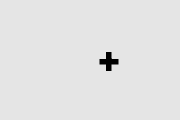

In [ ]:
### 1-1a: 画像の読込と表示（このセルの中身は触らなくて良い）
img1 = imutils.url_to_image('https://bit.ly/3gqDW32', cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if img1 is None:
  print('Image file not found.')

template = imutils.url_to_image('https://bit.ly/3tYCJTI', cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if template is None:
  print('Image file not found.')

# 画像を表示
cv2_imshow(img1)
cv2_imshow(template)

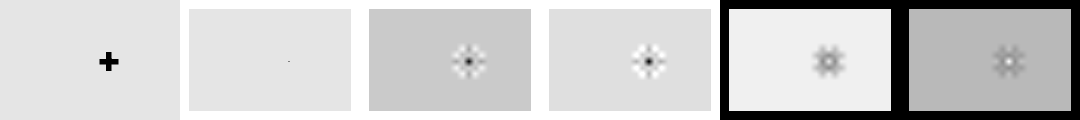

In [ ]:
### 6-2a テンプレートマッチング（様々な相違度／類似度関数の比較）

# 準備
rows1, cols1 =  img1.shape# 入力画像の大きさ取得
rowst, colst =  template.shape # テンプレート画像の大きさ取得
diff_img_max = np.full((rows1, cols1), 255, np.uint8) # 相違度（最大値）表示のための白い画像を用意
diff_img_abs = np.full((rows1, cols1), 255, np.uint16) # 相違度（絶対値）表示のための白い画像を用意
diff_img_sqr = np.full((rows1, cols1), 255, np.uint16) # 相違度（2乗）表示のための白い画像を用意
sim_img_cc = np.zeros((rows1, cols1), np.uint16) # 類似度（相互相関）表示のための黒い画像を用意
sim_img_ncc = np.zeros((rows1, cols1), np.uint16) # 類似度（正規化相互相関）表示のための黒い画像を用意

# 正規化相互相関計算のためにテンプレートの2乗和を計算
sum_t = 0
for k in range(0,rowst):
  for l in range(0,colst):
    sum_t += int(template[k][l])**2


# 入力画像をラスタ走査し，各画素位置における相違度・類似度を計算
for i in range(0, rows1 - rowst +1):
  for j in range(0, cols1 - colst +1):
    diff_max = 0
    diff_abs = 0
    diff_sqr = 0
    sim_cc = 0
    sum_i = 0
    # テンプレートと重複する範囲内のラスタ走査
    for k in range(0, rowst):
      for l in range(0, colst):
        diff_max = max(diff_max, np.abs(int(template[k][l])- int(img1[i+k][j+l])))
        diff_abs += np.abs(int(template[k][l]) - int(img1[i+k][j+l]))
        diff_sqr += (int(template[k][l]) - int(img1[i+k][j+l]))**2
        sim_cc += int(template[k][l]) * int(img1[i+k][j+l])
        sum_i += int(img1[i+k][j+l])**2

    diff_img_max[i+int(rowst/2)][j+int(colst/2)] = diff_max
    diff_img_abs[i+int(rowst/2)][j+int(colst/2)] = int(diff_abs/200)
    diff_img_sqr[i+int(rowst/2)][j+int(colst/2)] = int(diff_sqr/40000)
    sim_img_cc[i+int(rowst/2)][j+int(colst/2)] = int(sim_cc/40000)

    if sum_i ==0:
      sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] =0
    else:
      sim_img_ncc[i+int(rowst/2)][j+int(colst/2)] =int(255 * sim_cc/np.sqrt(sum_t) / np.sqrt(sum_i))



# 各相違度・類似度の分布を並べて表示
figure = np.hstack((img1, diff_img_max, diff_img_abs, diff_img_sqr, sim_img_cc, sim_img_ncc))
cv2_imshow(figure)








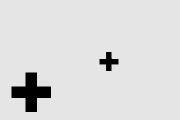

In [ ]:
### 1-1: 画像の読込と表示（このセルの中身は触らなくて良い）
img2 = imutils.url_to_image('https://bit.ly/3F7Fmch', cv2.IMREAD_GRAYSCALE)

# 読み込めなかった場合の例外処理
if img2 is None:
  print('Image file not found.')

# 画像を表示
cv2_imshow(img2)

(19, 19)
7 7
x 0.4 ( 7 7 )


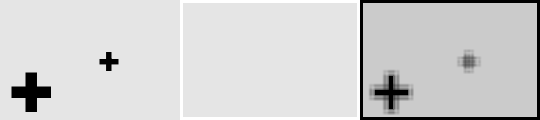

11 11
x 0.6 ( 11 11 )


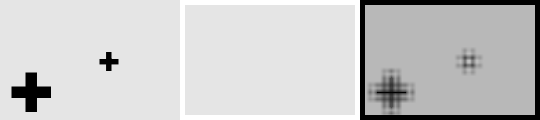

15 15
x 0.8 ( 15 15 )


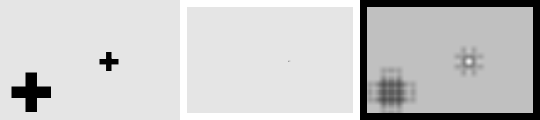

19 19
x 1.0 ( 19 19 )


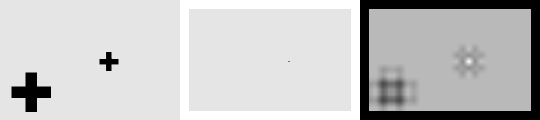

22 22
x 1.2 ( 22 22 )


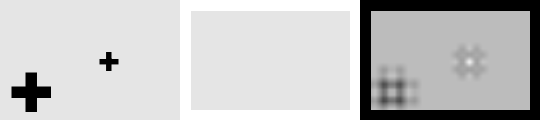

26 26
x 1.4 ( 26 26 )


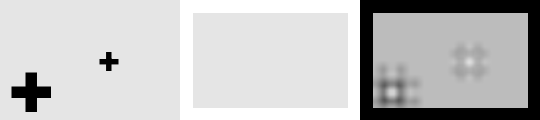

30 30
x 1.6 ( 30 30 )


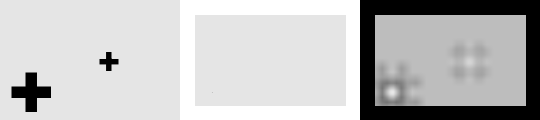

34 34
x 1.8 ( 34 34 )


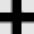

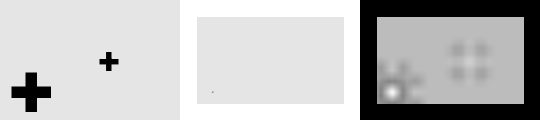

38 38
x 2.0 ( 38 38 )


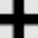

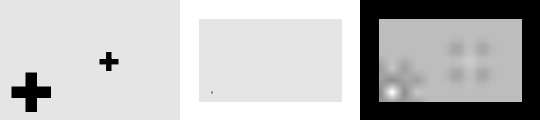

41 41
x 2.2 ( 41 41 )


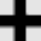

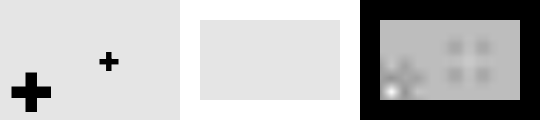

45 45
x 2.4 ( 45 45 )


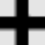

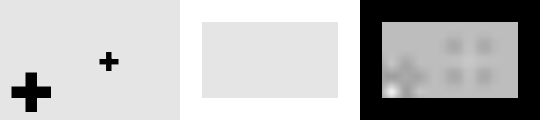

In [ ]:
### 6-2b テンプレートマッチング（様々な大きさへの対応）

# 準備
rows2, cols2 = img2.shape

# テンプレートを0.4倍から2.6倍まで0.2倍単位で拡縮して照合
for z in range(4,26,2):

  # 準備
  diff_img_max = np.full((rows2, cols2), 255, np.uint8)
  sim_img_ncc = np.zeros((rows2, cols2), np.uint16)
   # 相違度（最大値）表示のための白い画像を用意
   # 類似度（正規化相互相関）表示のための黒い画像を用意

  # テンプレートを拡縮
  rowstz = int(rowst * z/10)
  colstz = int(colst * z/10)
  template_z = cv2.resize(template, (rowstz, colstz))
  # 以下，6-2aと同様の処理
  # 正規化相互相関計算のためにテンプレートの2乗和を計算
  sum_t = 0
  for k in range(0,rowstz):
    for l in range(0,colstz):
      sum_t += int(template_z[k][l])**2


  # 入力画像をラスタ走査し，各画素位置における相違度・類似度を計算
  for i in range(0, rows2 - rowstz +1):
    for j in range(0, cols2 - colstz +1):
      diff_max = 0
      sim_cc = 0
      sum_i = 0
      # テンプレートと重複する範囲内のラスタ走査
      for k in range(0, rowstz):
        for l in range(0, colstz):
          diff_max = max(diff_max, np.abs(int(template_z[k][l])- int(img2[i+k][j+l])))
          sim_cc += int(template_z[k][l]) * int(img2[i+k][j+l])
          sum_i += int(img2[i+k][j+l])**2

      diff_img_max[i+int(rowstz/2)][j+int(colstz/2)] = diff_max
      sim_img_cc[i+int(rowstz/2)][j+int(colstz/2)] = int(sim_cc/40000)

      if sum_i ==0:
        sim_img_ncc[i+int(rowstz/2)][j+int(colstz/2)] =0
      else:
        sim_img_ncc[i+int(rowstz/2)][j+int(colstz/2)] =int(255 * sim_cc/np.sqrt(sum_t) / np.sqrt(sum_i))

  
  # 各相違度・類似度の分布を並べて表示
  print("x", z/10, "(", rowstz, colstz, ")")
  cv2_imshow(template_z)
  figure = np.hstack((img2, diff_img_max, sim_img_ncc))
  cv2_imshow(figure)


cv2.TM_CCOEFF


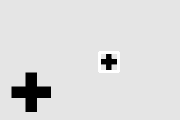

cv2.TM_CCOEFF_NORMED


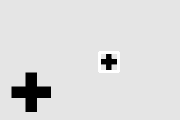

cv2.TM_CCORR


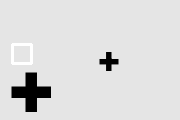

cv2.TM_CCORR_NORMED


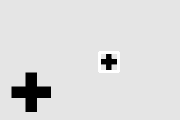

cv2.TM_SQDIFF


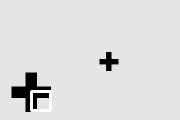

cv2.TM_SQDIFF_NORMED


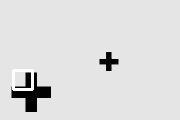

In [ ]:
### 6-2c：OpenCVの組み込み関数を使ってみる
# Methodsの一覧: https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# 各手法で評価
for meth in methods:
  tmp_img2 = img2.copy()# 結果表示用画像の用意
  method  = eval(meth)

  # テンプレートマッチングを適用
  res = cv2.matchTemplate(tmp_img2, template, method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  # 類似度（TM_SQDIFF，TM_SQDIFF_NORMED）の場合は最大値をとる場所を検出
  if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
    top_left= min_loc

  # 相違度（それ以外）の場合は最小値をとる場所を検出
  else:
    top_left=max_loc
  
  bottom_right = (top_left[0] + colst, top_left[1]+rowst)

  # 検出枠を重畳
  cv2.rectangle(tmp_img2, top_left, bottom_right, 255, 2)

  # 検出結果画像を表示
  print(meth)
  cv2_imshow(tmp_img2)